In [ ]:
file=open('/content/drive/MyDrive/Royal_data.txt', 'r')
royal_data=file.readlines()
print(royal_data)
file.close()

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [ ]:
for i in range(len(royal_data)):
  royal_data[i]=royal_data[i].lower().replace('\n',' ')
print(royal_data)

['the future king is the prince ', 'daughter is the princess ', 'son is the prince ', 'only a man can be a king ', 'only a woman can be a queen ', 'the princess will be a queen ', 'the prince is a strong man ', 'the princess is a beautiful woman ', 'prince is only a boy now ', 'prince will be king ', 'a boy will be a man']


In [ ]:
stopwords=['the','is','will','be','a','only','can','their','now','and','at','it']

filtered_data=[]
for sent in royal_data:
  temp=[]
  for word in sent.split():
    print(word)


the
future
king
is
the
prince
daughter
is
the
princess
son
is
the
prince
only
a
man
can
be
a
king
only
a
woman
can
be
a
queen
the
princess
will
be
a
queen
the
prince
is
a
strong
man
the
princess
is
a
beautiful
woman
prince
is
only
a
boy
now
prince
will
be
king
a
boy
will
be
a
man


In [ ]:
stopwords=['the','is','will','be','a','only','can','their','now','and','at','it']

filtered_data=[]
for sent in royal_data:
  temp=[]
  for word in sent.split():
    if word not in stopwords:
      temp.append(word)
  filtered_data.append(temp)
print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


In [ ]:
bigrams=[]
for word_list in filtered_data:
  for i in range(len(word_list)-1):
    for j in range(i+1, len(word_list)):
      bigrams.append([word_list[i],word_list[j]])
      bigrams.append([word_list[j],word_list[i]])
print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


In [ ]:
all_words=[]
for bi in bigrams:
  all_words.extend(bi)

all_words=list(set(all_words))
all_words.sort()
print(all_words)
print("total num of unique words are:" , len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
total num of unique words are: 12


In [ ]:
words_dict={}

counter=0

for word in all_words:
  words_dict[word]=counter
  counter +=1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [ ]:
import numpy as np

onehot_data=np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
  onehot_data[i][i]=1

onehot_dict={}
counter=0
for word in all_words:
  onehot_dict[word]=onehot_data[counter]
  counter +=1

for word in onehot_dict:
  print(word,':',onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
X= []
Y= []

for bi in bigrams:
  X.append(onehot_dict[bi[0]])
  Y.append(onehot_dict[bi[1]])
X=np.array(X)
Y=np.array(Y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

embed_size= 2
model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation='linear')
])
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.fit(X, Y, epochs=1000, batch_size=256, verbose=False)

In [ ]:
weights= model.get_weights()[0]

word_embeddings={}

for word in all_words:
  word_embeddings[word]=weights[words_dict[word]]

In [ ]:
print(word_embeddings)

{'beautiful': array([-0.12900919, -0.47905135], dtype=float32), 'boy': array([-0.19916946, -0.4290102 ], dtype=float32), 'daughter': array([0.34499776, 0.27536216], dtype=float32), 'future': array([0.52499264, 0.22616036], dtype=float32), 'king': array([-0.25573233,  0.5104254 ], dtype=float32), 'man': array([0.09341362, 0.33581755], dtype=float32), 'prince': array([-0.06354012,  0.45028806], dtype=float32), 'princess': array([-0.42646995,  0.49704665], dtype=float32), 'queen': array([0.3370459 , 0.00804256], dtype=float32), 'son': array([-0.4792214 , -0.05335057], dtype=float32), 'strong': array([ 0.38315368, -0.5227777 ], dtype=float32), 'woman': array([-0.35828254, -0.48577067], dtype=float32)}


In [ ]:
for word in all_words:
  print(word,':',word_embeddings[word])

beautiful : [-0.12900919 -0.47905135]
boy : [-0.19916946 -0.4290102 ]
daughter : [0.34499776 0.27536216]
future : [0.52499264 0.22616036]
king : [-0.25573233  0.5104254 ]
man : [0.09341362 0.33581755]
prince : [-0.06354012  0.45028806]
princess : [-0.42646995  0.49704665]
queen : [0.3370459  0.00804256]
son : [-0.4792214  -0.05335057]
strong : [ 0.38315368 -0.5227777 ]
woman : [-0.35828254 -0.48577067]


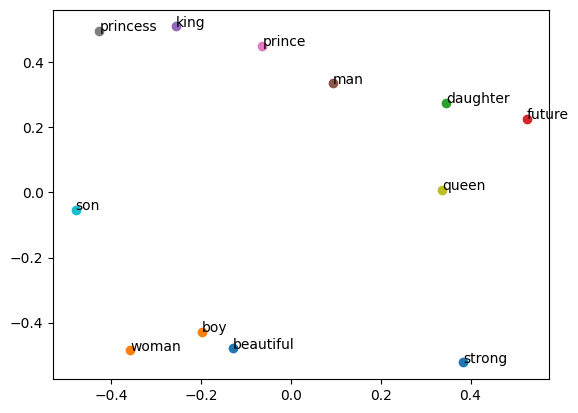

In [ ]:
import matplotlib.pyplot as plt

for word in list(words_dict.keys()):
  coord = word_embeddings.get(word)
  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))

In [ ]:
#-------------------------------------------------------------------

In [ ]:
!pip install --upgrade gensim -q

In [ ]:
import gensim

In [ ]:
gensim.__version__

'4.3.2'

In [ ]:
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import pandas as pd

import spacy
import string

In [ ]:
np.random.seed(42)

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv= api.load('glove-wiki-gigaword-50')

#wv.save('/content/drive/MyDrive/DEPI/twitter.kv')   save it in my drive

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
wv['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ], dtype=float32)

In [ ]:
len(wv['apple'])

50

In [ ]:
wv.similarity('apple', 'mango')

0.61270845

In [ ]:
wv.similarity('apple', 'car')

0.39515418

In [ ]:
#get the model from the drive#
#from gensim.models import KeyedVectors
#wv2=KeyedVectors.load('path')

wv2=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
len(wv2['apple'])

300

In [ ]:
wv2.similarity('apple', 'mango')

0.57518554

In [ ]:
wv2.similarity('apple', 'car')

0.12830707

In [ ]:
print(wv2.most_similar(positive=['car','minivan'], topn=5))

[('SUV', 0.8532192707061768), ('vehicle', 0.8175783753395081), ('pickup_truck', 0.7763688564300537), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565720081329346)]


In [ ]:
print(wv2.doesnt_match(['fire','water','land','sea','air','car']))

car


In [ ]:
wv2.most_similar(positive['woman','king'], negative=['man'], topn=3)

NameError: name 'positive' is not defined

In [ ]:
wv2.most_similar(positive['woman','king'],  topn=3)

Self Stady

glove